In [29]:
import os
os.chdir('C:\\Users\\Usuario\\Desktop\\wallace\\UNILA\\starlight-curve-project\\séries temporais\\owlpy-master\\owlpy')

In [30]:
'''normalizar e concatenar'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from biosppy.signals import tools
cv = pd.read_csv('exoTrain.csv')
signals=[]
for a in range(2):
    ncv = cv.loc[a,:]
    ncv= np.asarray(ncv)
    ncv= ncv[1:]
    signals.append(ncv)
sinal2=[]
sinal=[]
sinal1=[]
for c in range(len(signals)):
    H= tools.normalize(signal=signals[c], ddof=1)
    sinal2.append(H[0])
for b in range(len(signals)):
    sinal1= np.concatenate((sinal, sinal2[b]), axis=0)
    sinal= np.concatenate((sinal, signals[b]), axis=0)
print(sinal1)

[ 93.85        83.81        20.1        ...,   0.23142302   0.39039381
   0.45588178]


In [31]:
'''self join mp'''
from biosppy.signals import tools
m=50
ind , prof =tools.signal_self_join(signal=sinal1, size=m, index=None, limit=None)
prof

array([ 5.44802489,  5.76409917,  5.6615296 , ...,  4.77580835,
        4.7952224 ,  4.87192256])

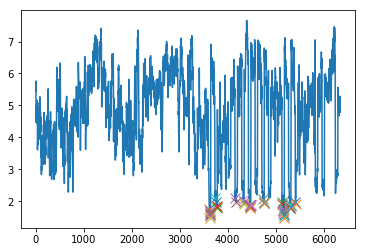

[3617,
 3621,
 3625,
 3628,
 3631,
 3635,
 3638,
 3641,
 3736,
 3756,
 3769,
 3772,
 3775,
 4154,
 4174,
 4326,
 4334,
 4341,
 4458,
 4460,
 4465,
 4470,
 4473,
 4475,
 4477,
 4480,
 4739,
 4752,
 4755,
 4757,
 4759,
 5133,
 5135,
 5151,
 5155,
 5159,
 5162,
 5165,
 5169,
 5172,
 5175,
 5295,
 5297,
 5302,
 5306,
 5309,
 5312,
 5314,
 5317,
 5412,
 5414]

In [32]:
'''minimos da matrix profile'''
desv= prof.std()
med= prof.mean()
ln = len(prof)
M= []
plt.plot(prof)
for c in range(ln -1):
    if (prof[c - 1]>prof[c]<prof[c + 1]):
        if( prof[c]< (med - (2*desv))):
            if(c%3197+m<len(signals[0])):
                M.append(c)
                plt.plot(c, prof[c],marker='x',ms=10)
plt.show()
M

In [33]:
'''lista de motifs normalizados'''
LMnn= []
LM=[]
localM=[]
for e in range(len(M)):
    f= sinal[M[e]:M[e]+m]
    LMnn.append(f)
    localM.append(np.asarray(M[e])) 
for z in range(len(LMnn)):
    R= tools.normalize(signal=LMnn[z], ddof=1)
    LM.append(R[0])
LM

[array([-0.05426345, -0.21890857, -0.30947786, -0.17304521,  0.0513525 ,
         0.06524172, -0.28054198,  0.35604725,  0.39655748,  0.43909321,
         0.28356289,  0.19849142,  0.16521516,  0.05381205,  0.38599588,
         0.81612765,  0.16738535,  0.17389592,  0.32855817,  0.77677487,
         0.48365446,  0.59679373,  0.65162721,  1.01115545,  0.387298  ,
         0.55570479, -1.28722105, -3.7801913 , -3.86251387, -3.29030695,
        -0.3547625 ,  0.00794868,  0.25694188,  0.25694188,  0.17924906,
         0.15667908,  0.19849142,  0.45905897,  0.30700095,  0.2308996 ,
         0.56062388,  0.74914111,  0.58652149,  0.17534272,  0.20109565,
         0.3451963 ,  0.31322216,  0.30367332, -0.1239989 ,  0.10285835]),
 array([ 0.02393213,  0.03782597, -0.30807267,  0.32872817,  0.36925186,
         0.41180174,  0.25621971,  0.17111996,  0.13783265,  0.0263925 ,
         0.35868676,  0.7889615 ,  0.14000356,  0.14651629,  0.30122995,
         0.74959563,  0.45637779,  0.56955467,  0

In [ ]:
'''salvando info'''
import pickle
l = LM
l2= localM
P= 'local dos motifs '+ str(m) + '.txt'
O= 'lista de motifs ' + str(m) + '.txt'
with open( O , 'wb') as fp:
    pickle.dump(l, fp)
with open( P , 'wb') as fp:
    pickle.dump(l2, fp)
with open( O , 'rb') as fp:
    LM= pickle.load(fp)

In [34]:
'''separando/agrupando motifs'''
mot = []
posiçaoM=[]
distgrupo=[]
while(len(LM) >= 3 ):
    Co= LM[1:]
    C= []
    w=[]
    euclim=[]
    for a in range(len(Co)):
        C= np.concatenate((C, Co[a]), axis=0)
    eucli = tools.distance_profile(query=LM[0], signal=C, metric='euclidean')
    M= []
    pM=[]
    M.append(LM[0])
    pM.append(localM[0])
    euc= eucli[0]
    for e in range(len(euc)):
        if((e%m)+len(LM[0])<=m):
            euclim.append(euc[e])
            w.append(e)
    for d in range(len(euclim)):
        if(euclim[d]<(np.min(euclim)+2)):
                u= w[d]
                M.append(C[u:u+m])
                pM.append(localM[int(u/m)+1])
                if(len(LM)>int(u/m)+1):
                    del(LM[int(u/m)+1])
                    del(localM[int(u/m)+1])
    mot.append(M)
    posiçaoM.append(pM)
    distgrupo.append(np.min(euclim))
    del(LM[0])    

In [ ]:
'''salvando info 2'''
l = mot
Q= 'motifs separados'+str(m)+'.txt'

with open( Q , 'wb') as fp:
    pickle.dump(l, fp)
with open( Q , 'rb') as fp:
    U= pickle.load(fp)
U

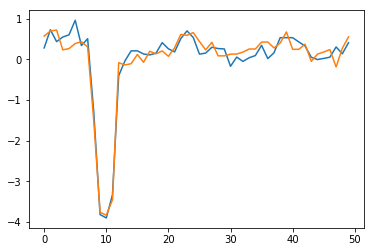

16

In [43]:
'''vizualização do grupo de motifs'''
r= 5
for j in range(len(mot[r])):
    plt.plot(mot[r][j])
plt.show()
len(mot)

In [46]:
'''list a ser salvado, num pares são grupos de mot e impares a distância considerada para forma-lo'''
beta=[]
for x in range(len(distgrupo)):
    beta.append(posiçaoM[x])
    beta.append(distgrupo[x])
beta

[[array(3617), array(5151)],
 1.75953243567437,
 [array(3617), array(4341), array(5155), array(5297)],
 1.6815892294681036,
 [array(3617), array(4334), array(4480), array(5302)],
 5.9532787562427876,
 [array(3617), array(4326), array(5135)],
 1.676501532078946,
 [array(3617), array(3638), array(3736), array(4154), array(5306)],
 6.2189433632968436,
 [array(3617), array(4759)],
 1.5412964083099638,
 [array(3617), array(4174), array(5133), array(5175)],
 1.583052769080995,
 [array(3617), array(3775), array(4473), array(5295)],
 2.8952997256947643,
 [array(3617), array(3628)],
 2.0837045308138258,
 [array(3617), array(3625)],
 1.9886070648892968,
 [array(3617), array(4755)],
 1.7928921593008948,
 [array(3617), array(4470)],
 3.8105763933964907,
 [array(3617), array(3631)],
 2.3485954664260831,
 [array(3617),
  array(3621),
  array(3641),
  array(3769),
  array(4458),
  array(4465),
  array(4477),
  array(4752),
  array(5159),
  array(5162),
  array(5165),
  array(5169),
  array(5172),
  a

In [50]:
'''salvando info final'''
import pickle
l = beta
Q= 'beta'+str(m)+'.txt'

with open( Q , 'wb') as fp:
    pickle.dump(l, fp)
with open( Q , 'rb') as fp:
    U= pickle.load(fp)
U

[[array(3617), array(5151)],
 1.75953243567437,
 [array(3617), array(4341), array(5155), array(5297)],
 1.6815892294681036,
 [array(3617), array(4334), array(4480), array(5302)],
 5.9532787562427876,
 [array(3617), array(4326), array(5135)],
 1.676501532078946,
 [array(3617), array(3638), array(3736), array(4154), array(5306)],
 6.2189433632968436,
 [array(3617), array(4759)],
 1.5412964083099638,
 [array(3617), array(4174), array(5133), array(5175)],
 1.583052769080995,
 [array(3617), array(3775), array(4473), array(5295)],
 2.8952997256947643,
 [array(3617), array(3628)],
 2.0837045308138258,
 [array(3617), array(3625)],
 1.9886070648892968,
 [array(3617), array(4755)],
 1.7928921593008948,
 [array(3617), array(4470)],
 3.8105763933964907,
 [array(3617), array(3631)],
 2.3485954664260831,
 [array(3617),
  array(3621),
  array(3641),
  array(3769),
  array(4458),
  array(4465),
  array(4477),
  array(4752),
  array(5159),
  array(5162),
  array(5165),
  array(5169),
  array(5172),
  a

In [51]:
for m in range(2):
    import pickle
    l = beta
    Q= 'beta'+str(m)+'.txt'

    with open( Q , 'wb') as fp:
        pickle.dump(l, fp)
    with open( Q , 'rb') as fp:
        U= pickle.load(fp)
    U